In [1]:
#importing libraies 
import numpy as np 
import pandas as pd
import os

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
#local dataset path for jupiter
#data = pd.read_csv("creditcard.csv")

In [5]:
#mounting google drive to upload the datset
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
#uploading the dataset to train
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/ML/creditcard.csv")

In [7]:
#visualizing the data to a variable
print(data.columns)
data.head()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#visualize the data with the shape
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


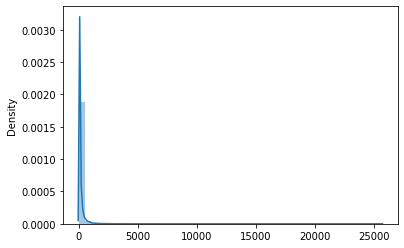

In [9]:
#Visualizing the details of 'Amount'
Amount = [data['Amount'].values]
sb.distplot(Amount)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

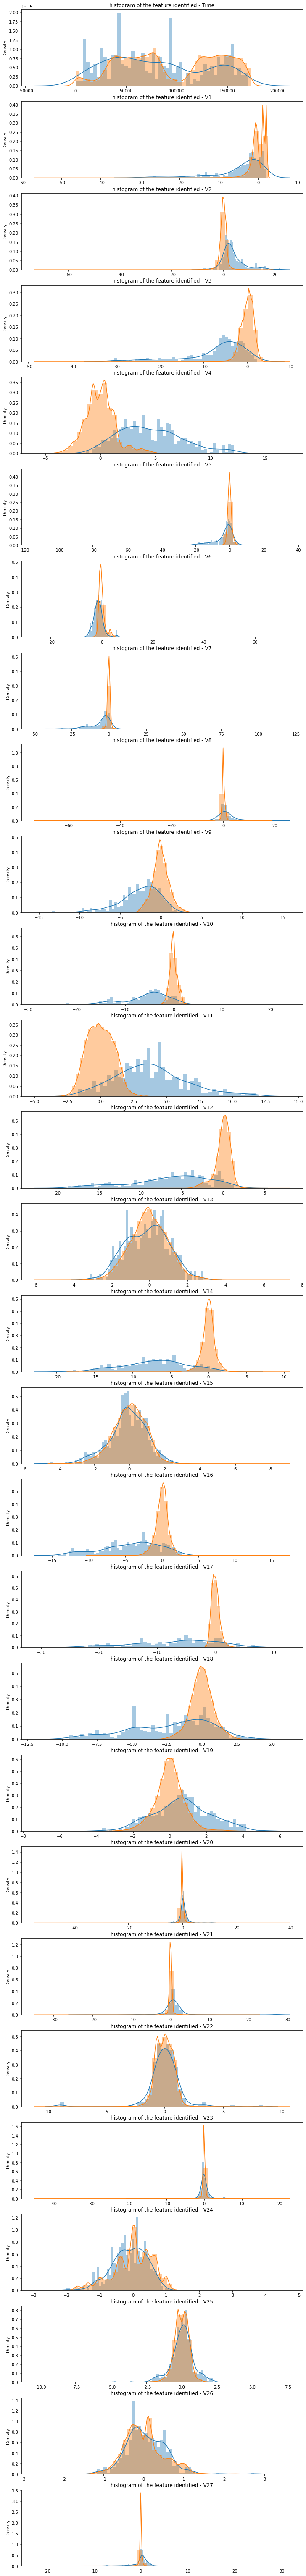

In [10]:
from matplotlib import gridspec
#Distributing the features of fraud
features = data.iloc[:,0:28].columns

plt.figure(figsize=(12,28*4))

gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sb.distplot(data[c][data.Class == 1], bins=50)
    sb.distplot(data[c][data.Class == 0], bins=50)
    ax.set_xlabel('')
    #visualize the histogram time period vise
    ax.set_title('histogram of the feature identified - ' + str(c))
plt.show()

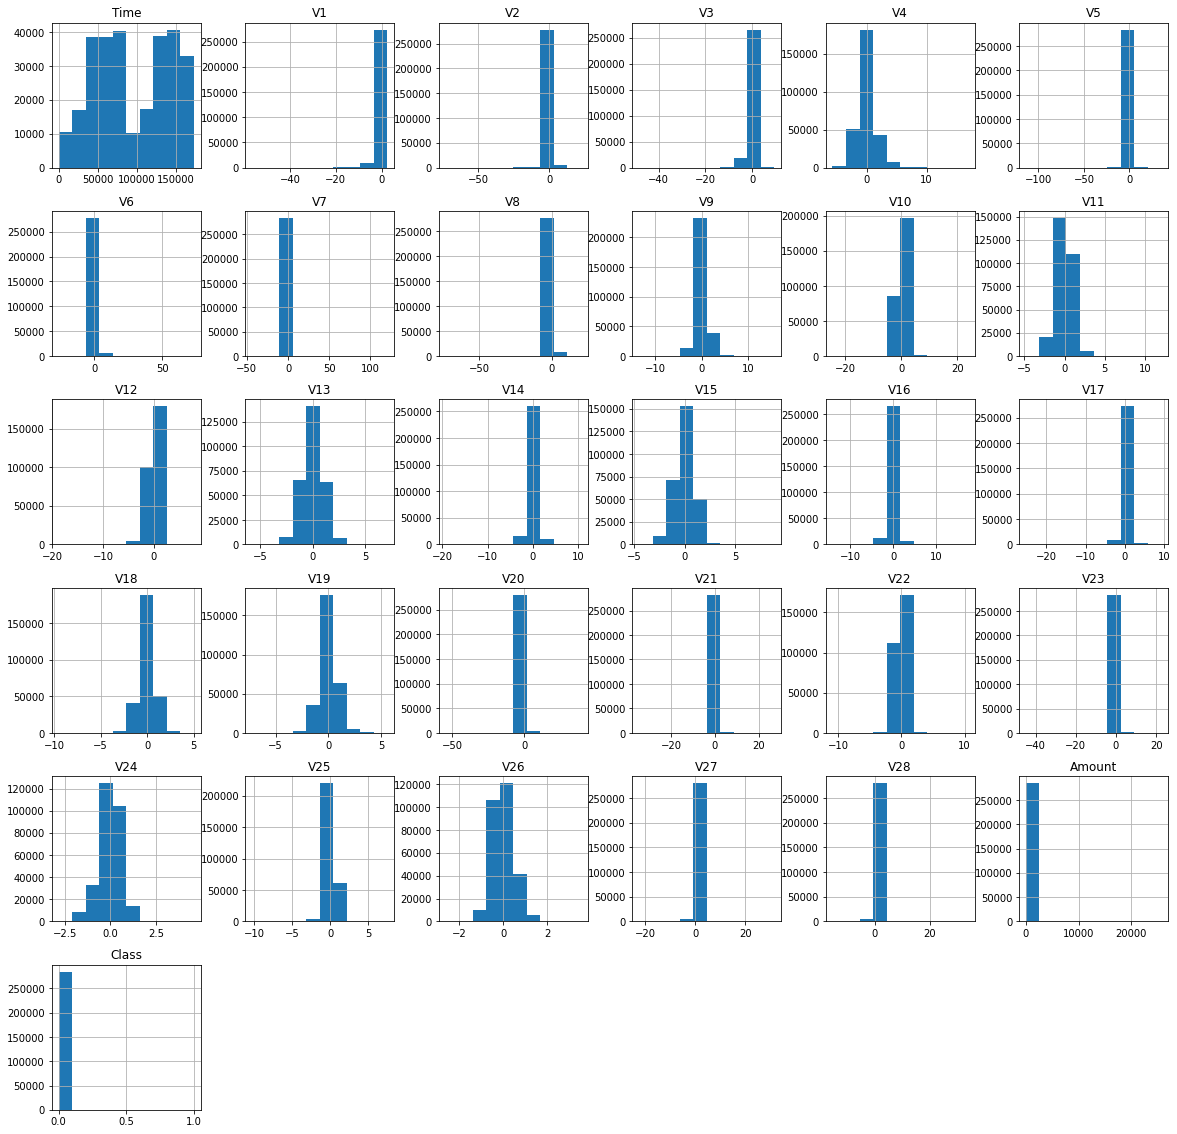

In [11]:
#showing plot histograms
data.hist(figsize = (20, 20))
plt.show()

In [12]:
#fraud transaction numeric details
Fraud_transaction = data[data['Class'] == 1]
Valid_transaction = data[data['Class'] == 0]

outlier_fraction = len(Fraud_transaction)/float(len(Valid_transaction))
print(outlier_fraction)

#counting cases
print('Fraud transaction Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid transaction Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud transaction Cases: 492
Valid transaction Transactions: 284315


In [13]:
print("Detailed view of frauded transacations")
Fraud_transaction.Amount.describe()

Detailed view of frauded transacations


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
print("Detailed view of valid transactions")
Valid_transaction.Amount.describe()

Detailed view of valid transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

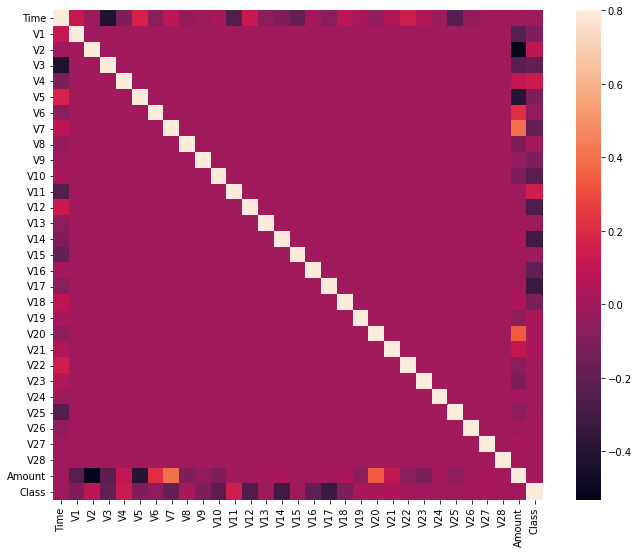

In [15]:
#correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sb.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [16]:
#seperating the X and the Y from the dataset
X=data.drop(['Class'], axis=1)
Y=data["Class"]
print(X.shape)
print(Y.shape)

#getting the values as a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(284807, 30)
(284807,)


In [17]:
X_data

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [18]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split

#split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [20]:
#another model/classifier ISOLATION FOREST
from sklearn.ensemble import IsolationForest
ifc=IsolationForest(max_samples=len(X_train),
                    contamination=outlier_fraction,random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)

#reshaping the prediction values to 0 - valid, 1 - fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != Y_test).sum()

the Model used is Isolation Forest
The accuracy is  0.9979459990871107
The precision is 0.38823529411764707
The recall is 0.336734693877551
The F1-Score is 0.36065573770491804
The Matthews correlation coefficient is0.3605460930519415


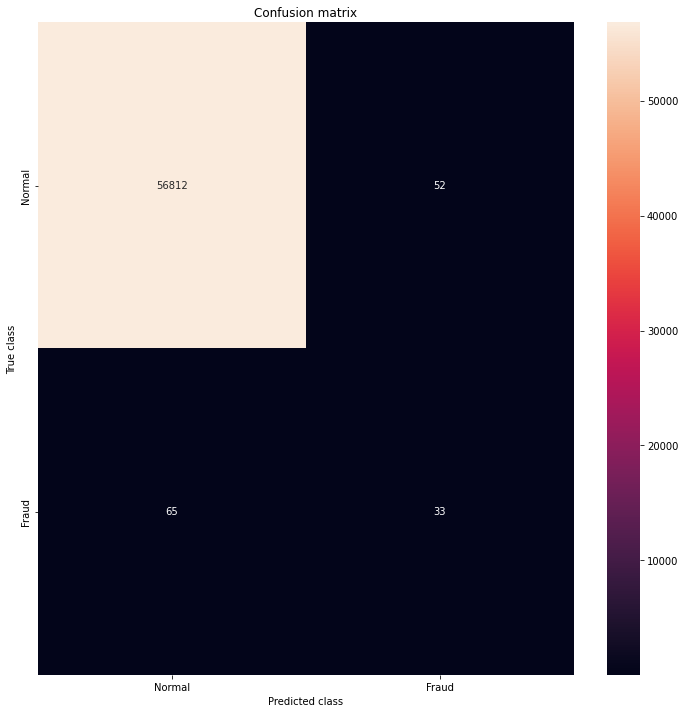

Isolation Forest: 117
0.9979459990871107
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.34      0.36        98

    accuracy                           1.00     56962
   macro avg       0.69      0.67      0.68     56962
weighted avg       1.00      1.00      1.00     56962



<Figure size 648x504 with 0 Axes>

In [21]:
#model evaluation
#scoring and printing
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud_transaction)
print("the Model used is {}".format("Isolation Forest"))
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Isolation Forest", n_errors))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

In [22]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#creating random forest model
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

# predictions
y_pred = rfc.predict(X_test)

In [23]:
print(y_pred)

[1 0 0 ... 0 0 0]


The model used is Random Forest classifier
Model accuracy is  0.9995962220427653
Model precision is 0.9746835443037974
Model recall is 0.7857142857142857
The F1-Score is 0.8700564971751412
The Matthews correlation coefficient is 0.8749276812909632


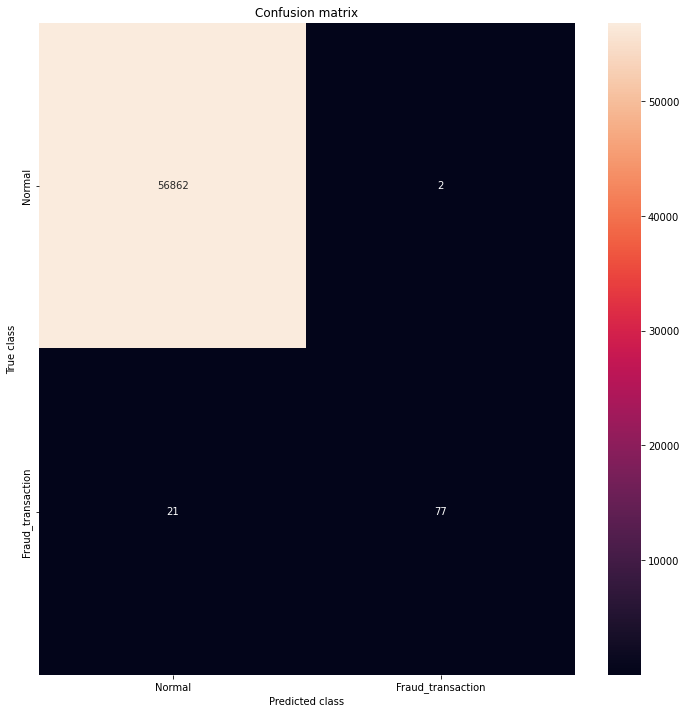

Random Forest: 23
0.9995962220427653
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



<Figure size 648x504 with 0 Axes>

In [24]:
#evaluating classifier
#scoring and printing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud_transaction)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("Model accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("Model precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("Model recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))


#printing the confusion matrix
LABELS = ['Normal', 'Fraud_transaction']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#classification metrics running
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

In [25]:
#visualizing the random tree 
feature_list = list(X.columns)

#tools for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

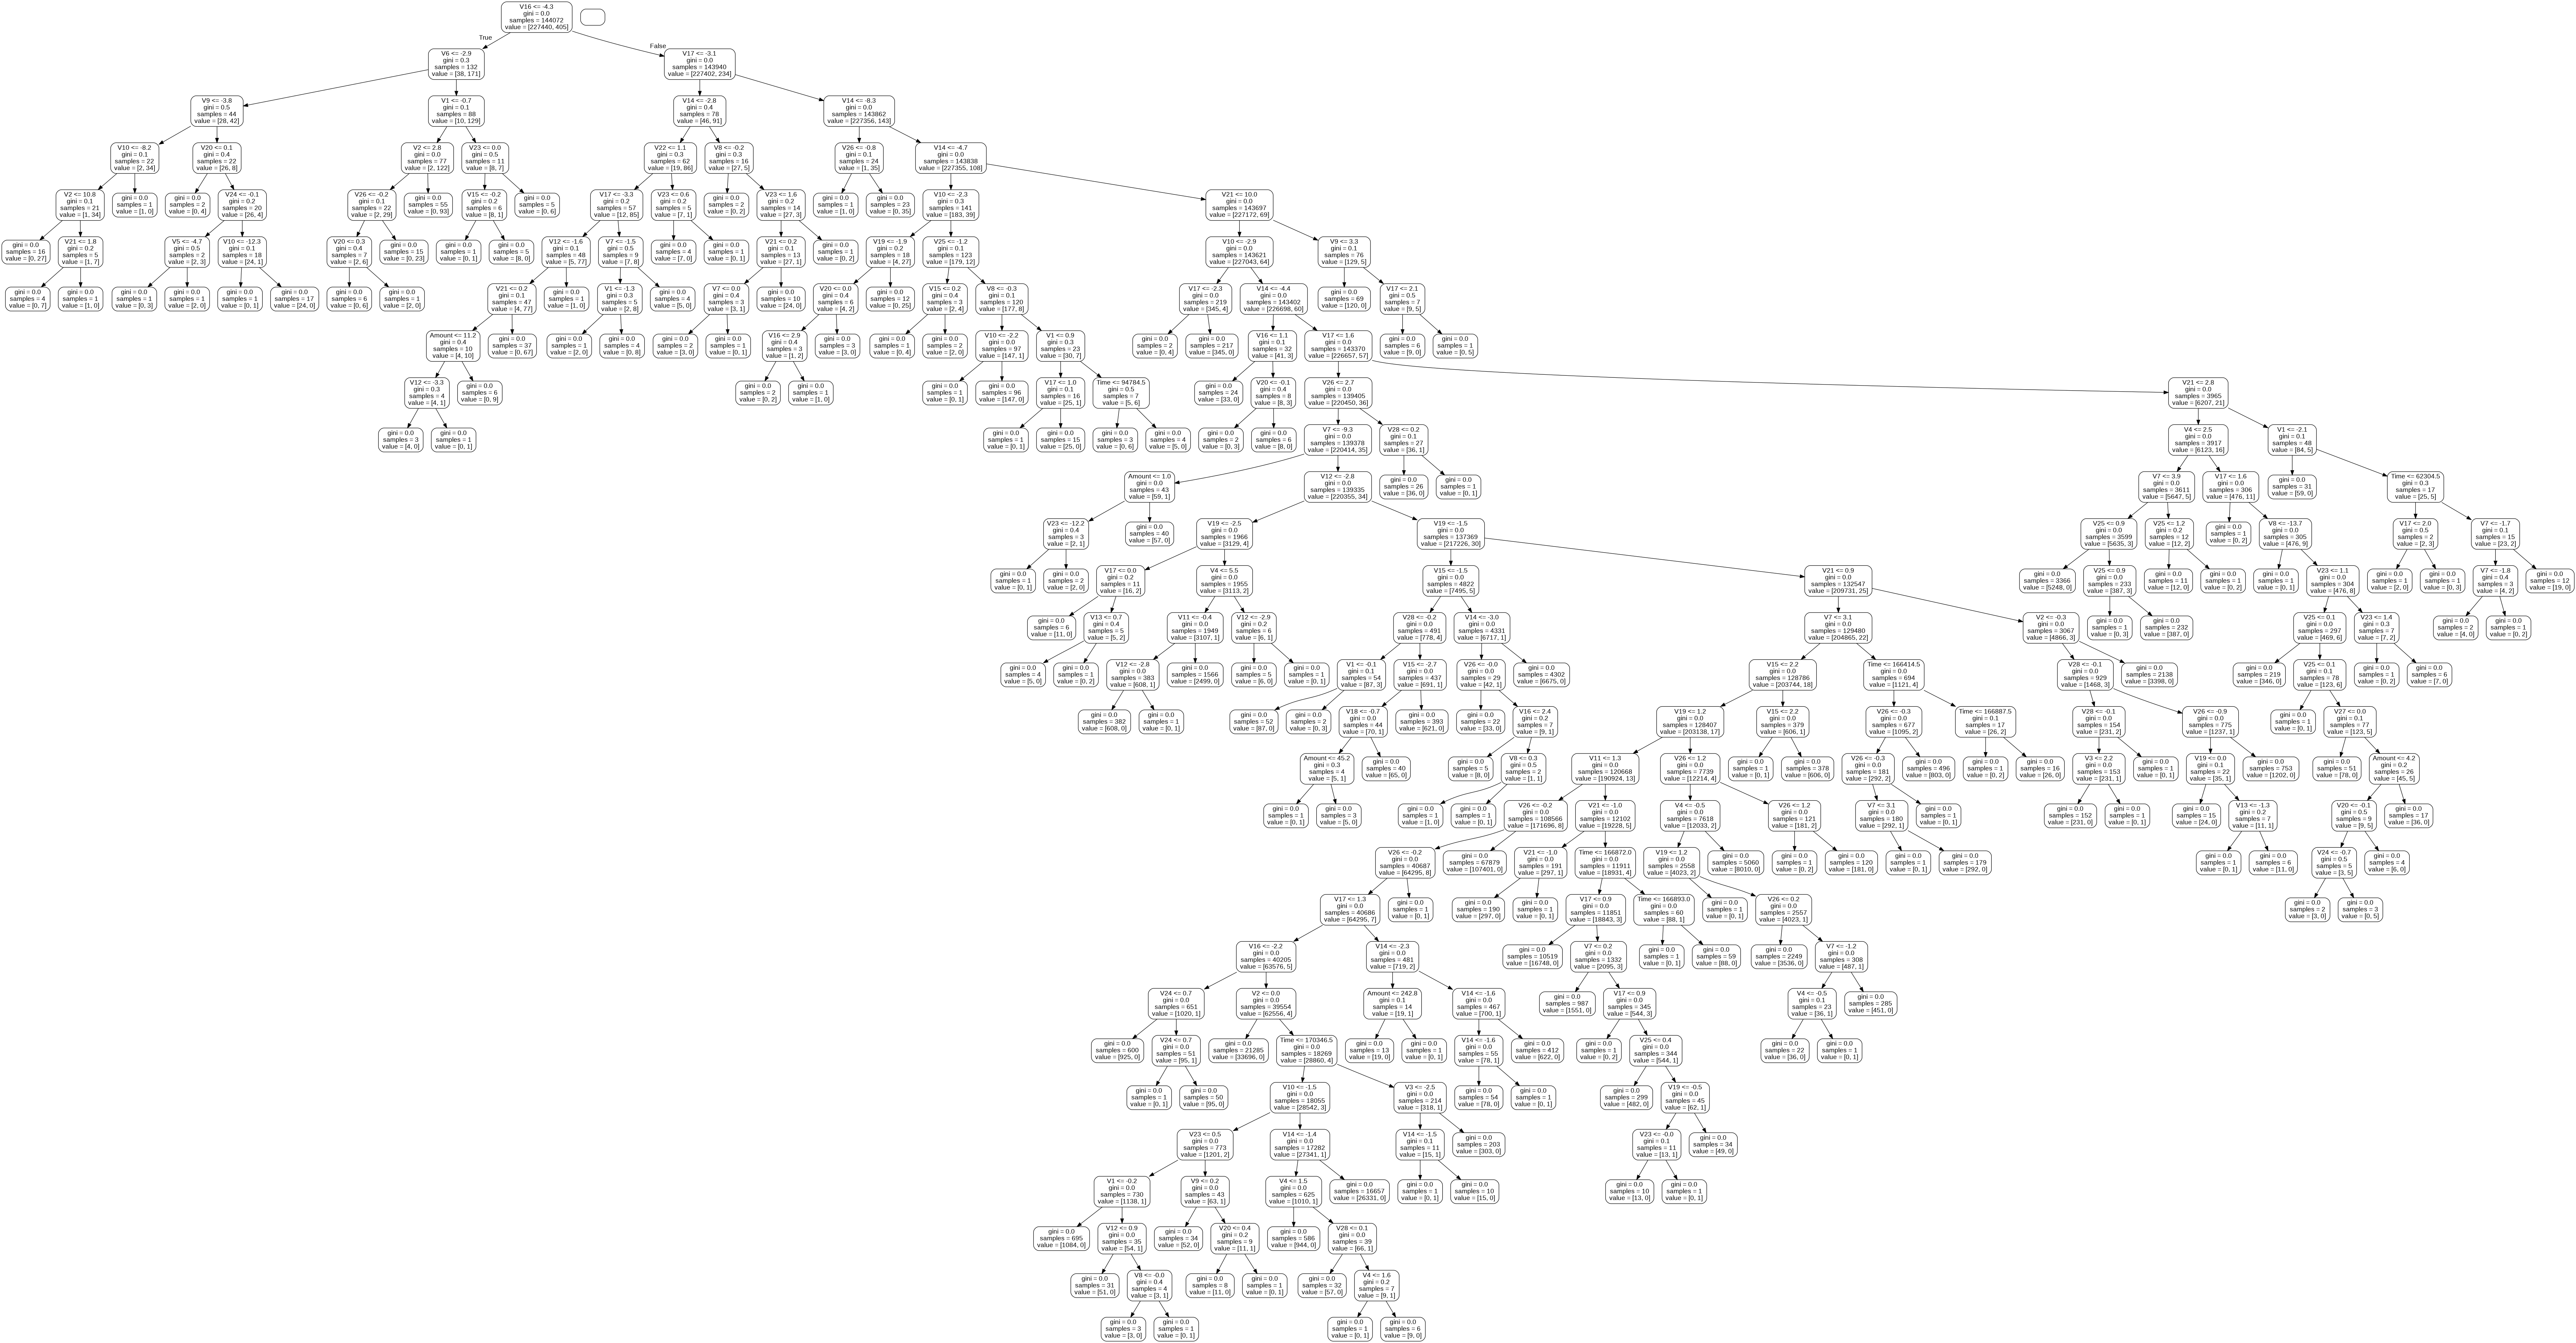

In [26]:
#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
#dot file for graph creation
(graph, ) = pydot.graph_from_dot_file('tree.dot')
#graph to a png file
display(Image(graph.create_png()))

In [27]:
#test classification
from sklearn.datasets import make_classification
#dataset defining
X, y = make_classification(n_samples=1000, n_features=28, n_informative=15, n_redundant=5, random_state=3)
#dataset summarizing
print(X_data.shape, Y_data.shape)
print(X_train.shape, Y_train.shape)

(284807, 30) (284807,)
(227845, 30) (227845,)


In [28]:
#evaluating algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
#model defining
model1 = RandomForestClassifier()
#model evaluating
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model1,X_train,Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#reporting performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 1.000 (0.000)


In [32]:
#making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
#model defining
model1 = RandomForestRegressor()
#fit the model
model1.fit(X_train,Y_train)
# make a single prediction for test
row = [[172792,-0.533412522,-0.189733337,0.703337367,-0.50627124,-0.012545679,-0.649616686,1.577006254,-0.414650408,0.486179505,-0.915426649,-1.040458335,-0.031513054,-0.188092901,-0.08431647,0.041333455,-0.302620086,-0.660376645,0.167429934,-0.256116871,0.382948105,0.261057331,0.643078438,0.376777014,0.008797379,-0.473648704,-0.818267121,-0.002415309,0.013648914,217]]
yhat = model1.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 0
